<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

`ml` contains the code base to process glycan for machine learning, construct state-of-the-art machine learning models, train them, and analyze trained models + glycan representations. It currently contains the following modules:

- `model_training` contains functions for training machine learning models
- `models` describes some examples for machine learning architectures applicable to glycans
- `processing` contains helper functions to prepare glycan data for model training
- `inference` can be used to analyze trained models, make predictions, or obtain glycan representations
- `train_test_split` contains various data split functions to get appropriate training and test sets

## model_training
>contains functions for training machine learning models

In [1]:
#| echo: false
#| output: asis
show_doc(EarlyStopping)

---

### EarlyStopping

>      EarlyStopping (patience=7, verbose=False)

Early stops the training if validation loss doesn't improve after a given patience.

In [2]:
#| echo: false
#| output: asis
show_doc(train_model)

---

### train_model

>      train_model (model, dataloaders, criterion, optimizer, scheduler,
>                   num_epochs=25, patience=50, mode='classification',
>                   mode2='multi')

trains a deep learning model on predicting glycan properties

| Arguments:
| :-
| model (PyTorch object): graph neural network (such as SweetNet) for analyzing glycans
| dataloaders (PyTorch object): dictionary of dataloader objects with keys 'train' and 'val'
| criterion (PyTorch object): PyTorch loss function
| optimizer (PyTorch object): PyTorch optimizer
| scheduler (PyTorch object): PyTorch learning rate decay
| num_epochs (int): number of epochs for training; default:25
| patience (int): number of epochs without improvement until early stop; default:50
| mode (string): 'classification', 'multilabel', or 'regression'; default:classification
| mode2 (string): further specifying classification into 'multi' or 'binary' classification;default:multi

| Returns:
| :-
| Returns the best model seen during training

In [3]:
#| echo: false
#| output: asis
show_doc(training_setup)

---

### training_setup

>      training_setup (model, lr, lr_patience=4, factor=0.2,
>                      weight_decay=0.0001, mode='multiclass', gsam_alpha=0.0)

prepares optimizer, learning rate scheduler, and loss criterion for model training

| Arguments:
| :-
| model (PyTorch object): graph neural network (such as SweetNet) for analyzing glycans
| lr (float): learning rate
| lr_patience (int): number of epochs without validation loss improvement before reducing the learning rate;default:4
| factor (float): factor by which learning rate is multiplied upon reduction
| weight_decay (float): regularization parameter for the optimizer; default:0.001
| mode (string): 'multiclass': classification with multiple classes, 'multilabel': predicting several labels at the same time, 'binary':binary classification, 'regression': regression; default:'multiclass'
| gsam_alpha (float): if higher than zero, uses GSAM instead of SAM for the optimizer

| Returns:
| :-
| Returns optimizer, learning rate scheduler, and loss criterion objects

In [4]:
#| echo: false
#| output: asis
show_doc(train_ml_model)

---

### train_ml_model

>      train_ml_model (X_train, X_test, y_train, y_test, mode='classification',
>                      feature_calc=False, return_features=False,
>                      feature_set=['known', 'exhaustive'],
>                      additional_features_train=None,
>                      additional_features_test=None)

wrapper function to train standard machine learning models on glycans

| Arguments:
| :-
| X_train, X_test (list or dataframe): either lists of glycans (needs feature_calc = True) or motif dataframes such as from annotate_dataset
| y_train, y_test (list): lists of labels
| mode (string): 'classification' or 'regression'; default:'classification'
| feature_calc (bool): set to True for calculating motifs from glycans; default:False
| return_features (bool): whether to return calculated features; default:False
| feature_set (list): which feature set to use for annotations, add more to list to expand; default:['known','exhaustive']; options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans), and 'exhaustive' (all mono- and disaccharide features)
| additional_features_train (dataframe): additional features (apart from glycans) to be used for training. Has to be of the same length as X_train; default:None
| additional_features_test (dataframe): additional features (apart from glycans) to be used for evaluation. Has to be of the same length as X_test; default:None

| Returns:
| :-
| Returns trained model

In [ ]:
mammal = [1 if k == 'Mammalia' else 0 for k in df_species[df_species.Phylum=='Chordata'].Class.values.tolist()]
X_train, X_test, y_train, y_test = general_split(df_species[df_species.Phylum=='Chordata'].target.values.tolist(), mammal)
model_ft, _, X_test = train_ml_model(X_train, X_test, y_train, y_test, feature_calc = True, feature_set = ['exhaustive'],
                         return_features = True)


Calculating Glycan Features...

Training model...

Evaluating model...
Accuracy of trained model on separate validation set: 0.8948863636363636


In [5]:
#| echo: false
#| output: asis
show_doc(analyze_ml_model)

---

### analyze_ml_model

>      analyze_ml_model (model)

plots relevant features for model prediction

| Arguments:
| :-
| model (model object): trained machine learning model from train_ml_model

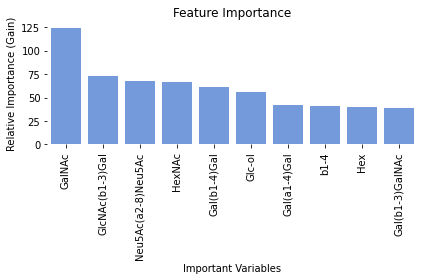

In [ ]:
analyze_ml_model(model_ft)

In [6]:
#| echo: false
#| output: asis
show_doc(get_mismatch)

---

### get_mismatch

>      get_mismatch (model, X_test, y_test, n=10)

analyzes misclassifications of trained machine learning model

| Arguments:
| :-
| model (model object): trained machine learning model from train_ml_model
| X_test (dataframe): motif dataframe used for validating model
| y_test (list): list of labels
| n (int): number of returned misclassifications; default:10

| Returns:
| :-
| Returns tuples of misclassifications and their predicted probability

In [ ]:
get_mismatch(model_ft, X_test, y_test)

[('Gal(?1-?)[Neu5Gc(a2-?)]Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(?1-?)[Neu5Gc(a2-?)]Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.5203443765640259),
 ('Gal3S(b1-3)[Fuc(a1-2)]Gal(b1-3)[GlcNAc(b1-6)]GalNAc', 0.5743801593780518),
 ('Gal1Cer3S', 0.7558071613311768),
 ('Man(a1-2)Man(a1-6)[Man(a1-3)]Man(a1-6)[Glc(a1-3)Man(a1-2)Man(a1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.8287261128425598),
 ('Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)Glc1Cer', 0.6059761643409729),
 ('Neu5Ac(a2-3)[GalNAc(b1-4)]Gal(b1-3)[GlcNAc(b1-6)]GalNAc',
  0.6028361916542053),
 ('GalNAc(b1-4)GlcNAc(b1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
  0.8487561941146851),
 ('Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-?)[Gal(b1-4)GlcNAc(b1-2)Man(a1-?)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
  0.7756061553955078),
 ('Fuc(a1-2)Gal(a1-3)Gal(a1-4)Gal(b1-3)[GlcNAc(b1-6)]GalNAc',
  0.5661913156509399),
 ('Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-?)[Gal(b1-4)GlcNAc(b1-?)]Man(a1-3)[Man(a1-?)Ma

## models
>describes some examples for machine learning architectures applicable to glycans. The main portal is prep_models which allows users to setup (trained) models by their string names

In [7]:
#| echo: false
#| output: asis
show_doc(SweetNet)

---

### SweetNet

>      SweetNet (lib_size, num_classes=1)

given glycan graphs as input, predicts properties via a graph neural network

| Arguments:
| :-
| lib_size (int): number of unique tokens for graph nodes; usually len(lib)
| num_classes (int): number of output classes; only >1 for multilabel classification; default:1

| Returns:
| :-
| Returns batch-wise predictions

In [8]:
#| echo: false
#| output: asis
show_doc(LectinOracle)

---

### LectinOracle

>      LectinOracle (input_size_glyco, hidden_size=128, num_classes=1,
>                    data_min=-11.355, data_max=23.892, input_size_prot=1280)

given glycan graphs and protein representations as input, predicts protein-glycan binding

| Arguments:
| :-
| input_size_glyco (int): number of unique tokens for graph nodes; usually len(lib)
| hidden_size (int): layer size for the graph convolutions; default:128
| num_classes (int): number of output classes; only >1 for multilabel classification; default:1
| data_min (float): minimum observed value in training data; default: -11.355
| data_max (float): maximum observed value in training data; default: 23.892
| input_size_prot (int): dimensionality of protein representations used as input; default:1280

| Returns:
| :-
| Returns batch-wise predictions

In [9]:
#| echo: false
#| output: asis
show_doc(LectinOracle_flex)

---

### LectinOracle_flex

>      LectinOracle_flex (input_size_glyco, hidden_size=128, num_classes=1,
>                         data_min=-11.355, data_max=23.892,
>                         input_size_prot=1000)

given glycan graphs and protein sequences as input, predicts protein-glycan binding

| Arguments:
| :-
| input_size_glyco (int): number of unique tokens for graph nodes; usually len(lib)
| hidden_size (int): layer size for the graph convolutions; default:128
| num_classes (int): number of output classes; only >1 for multilabel classification; default:1
| data_min (float): minimum observed value in training data; default: -11.355
| data_max (float): maximum observed value in training data; default: 23.892
| input_size_prot (int): maximum length of protein sequence for padding/cutting; default:1000

| Returns:
| :-
| Returns batch-wise predictions

In [10]:
#| echo: false
#| output: asis
show_doc(NSequonPred)

---

### NSequonPred

>      NSequonPred ()

given an ESM1b representation of N and 20 AA up + downstream, predicts whether it's a sequon

| Returns:
| :-
| Returns batch-wise predictions

In [11]:
#| echo: false
#| output: asis
show_doc(init_weights)

---

### init_weights

>      init_weights (model, mode='sparse', sparsity=0.1)

initializes linear layers of PyTorch model with a weight initialization

| Arguments:
| :-
| model (Pytorch object): neural network (such as SweetNet) for analyzing glycans
| mode (string): which initialization algorithm; choices are 'sparse','kaiming','xavier';default:'sparse'
| sparsity (float): proportion of sparsity after initialization; default:0.1 / 10%

In [12]:
#| echo: false
#| output: asis
show_doc(prep_model)

---

### prep_model

>      prep_model (model_type, num_classes, libr=None, trained=False)

wrapper to instantiate model, initialize it, and put it on the GPU

| Arguments:
| :-
| model_type (string): string indicating the type of model
| num_classes (int): number of unique classes for classification
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset

| Returns:
| :-
| Returns PyTorch model object

## processing
>contains helper functions to prepare glycan data for model training

In [13]:
#| echo: false
#| output: asis
show_doc(dataset_to_graphs)

---

### dataset_to_graphs

>      dataset_to_graphs (glycan_list, labels, libr=None,
>                         label_type=torch.int64)

wrapper function to convert a whole list of glycans into a graph dataset

| Arguments:
| :-
| glycan_list (list): list of IUPAC-condensed glycan sequences as strings
| labels (list): list of labels
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| label_type (torch object): which tensor type for label, default is torch.long for binary labels, change to torch.float for continuous

| Returns:
| :-
| Returns list of node list / edge list / label list data tuples

In [14]:
#| echo: false
#| output: asis
show_doc(dataset_to_dataloader)

---

### dataset_to_dataloader

>      dataset_to_dataloader (glycan_list, labels, libr=None, batch_size=32,
>                             shuffle=True, drop_last=False, extra_feature=None,
>                             label_type=torch.int64)

wrapper function to convert glycans and labels to a torch_geometric DataLoader

| Arguments:
| :-
| glycan_list (list): list of IUPAC-condensed glycan sequences as strings
| labels (list): list of labels
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| batch_size (int): how many samples should be in each batch; default:32
| shuffle (bool): if samples should be shuffled when making dataloader; default:True
| drop_last (bool): whether last batch is dropped; default:False
| extra_feature (list): can be used to feed another input to the dataloader; default:None
| label_type (torch object): which tensor type for label, default is torch.long for binary labels, change to torch.float for continuous

| Returns:
| :-
| Returns a dataloader object used for training deep learning models

In [15]:
#| echo: false
#| output: asis
show_doc(split_data_to_train)

---

### split_data_to_train

>      split_data_to_train (glycan_list_train, glycan_list_val, labels_train,
>                           labels_val, libr=None, batch_size=32,
>                           drop_last=False, extra_feature_train=None,
>                           extra_feature_val=None, label_type=torch.int64)

wrapper function to convert split training/test data into dictionary of dataloaders

| Arguments:
| :-
| glycan_list_train (list): list of IUPAC-condensed glycan sequences as strings
| glycan_list_val (list): list of IUPAC-condensed glycan sequences as strings
| labels_train (list): list of labels
| labels_val (list): list of labels
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| batch_size (int): how many samples should be in each batch; default:32
| drop_last (bool): whether last batch is dropped; default:False
| extra_feature_train (list): can be used to feed another input to the dataloader; default:None
| extra_feature_val (list): can be used to feed another input to the dataloader; default:None
| label_type (torch object): which tensor type for label, default is torch.long for binary labels, change to torch.float for continuous

| Returns:
| :-
| Returns a dictionary of dataloaders for training and testing deep learning models

## inference
>can be used to analyze trained models, make predictions, or obtain glycan representations

In [16]:
#| echo: false
#| output: asis
show_doc(glycans_to_emb)

---

### glycans_to_emb

>      glycans_to_emb (glycans, model, libr=None, batch_size=32, rep=True,
>                      class_list=None)

Returns a dataframe of learned representations for a list of glycans

| Arguments:
| :-
| glycans (list): list of glycans in IUPAC-condensed as strings
| model (PyTorch object): trained graph neural network (such as SweetNet) for analyzing glycans
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| batch_size (int): change to batch_size used during training; default:32
| rep (bool): True returns representations, False returns actual predicted labels; default is True
| class_list (list): list of unique classes to map predictions

| Returns:
| :-
| Returns dataframe of learned representations (columns) for each glycan (rows)

In [17]:
#| echo: false
#| output: asis
show_doc(get_lectin_preds)

---

### get_lectin_preds

>      get_lectin_preds (prot, glycans, model, prot_dic={},
>                        background_correction=False, correction_df=None,
>                        batch_size=128, libr=None, sort=True, flex=False)

Wrapper that uses LectinOracle-type model for predicting binding of protein to glycans

| Arguments:
| :-
| prot (string): protein amino acid sequence
| glycans (list): list of glycans in IUPACcondensed
| model (PyTorch object): trained LectinOracle-type model
| prot_dic (dictionary): dictionary of type protein sequence:ESM1b representation
| background_correction (bool): whether to correct predictions for background; default:False
| correction_df (dataframe): background prediction for (ideally) all provided glycans; default:V4 correction file
| batch_size (int): change to batch_size used during training; default:128
| libr (list): sorted list of unique glycoletters observed in the glycans of our dataset
| sort (bool): whether to sort prediction results descendingly; default:True
| flex (bool): depends on whether you use LectinOracle (False) or LectinOracle_flex (True); default:False

| Returns:
| :-
| Returns dataframe of glycan sequences and predicted binding to prot

In [18]:
#| echo: false
#| output: asis
show_doc(get_Nsequon_preds)

---

### get_Nsequon_preds

>      get_Nsequon_preds (prots, model, prot_dic)

Predicts whether an N-sequon will be glycosylated

| Arguments:
| :-
| prots (list): list of protein sequences (strings), in the form of 20 AA + N + 20 AA; replace missing sequence with corr. number of 'z'
| model (PyTorch object): trained NSequonPred-type model
| prot_dic (dictionary): dictionary of type protein sequence:ESM1b representation

| Returns:
| :-
| Returns dataframe of protein sequences and predicted likelihood of being an N-sequon

In [19]:
#| echo: false
#| output: asis
show_doc(get_esm1b_representations)

---

### get_esm1b_representations

>      get_esm1b_representations (prots, model, alphabet)

Retrieves ESM1b representations of protein for using them as input for LectinOracle

| Arguments:
| :-
| prots (list): list of protein sequences (strings) that should be converted
| model (ESM1b object): trained ESM1b model; from running esm.pretrained.esm1b_t33_650M_UR50S()
| alphabet (ESM1b object): used for converting sequences; from running esm.pretrained.esm1b_t33_650M_UR50S()

| Returns:
| :-
| Returns dictionary of the form protein sequence:ESM1b representation

In order to run `get_esm1b_representations`, you first have to run this snippet:

`!pip install fair-esm
import esm
model, alphabet = esm.pretrained.esm1b_t33_650M_UR50S()`

## train_test_split
>contains various data split functions to get appropriate training and test sets

In [20]:
#| echo: false
#| output: asis
show_doc(hierarchy_filter)

---

### hierarchy_filter

>      hierarchy_filter (df_in, rank='Domain', min_seq=5, wildcard_seed=False,
>                        wildcard_list=None, wildcard_name=None, r=0.1,
>                        col='target')

stratified data split in train/test at the taxonomic level, removing duplicate glycans and infrequent classes

| Arguments:
| :-
| df_in (dataframe): dataframe of glycan sequences and taxonomic labels
| rank (string): which rank should be filtered; default:'domain'
| min_seq (int): how many glycans need to be present in class to keep it; default:5
| wildcard_seed (bool): set to True if you want to seed wildcard glycoletters; default:False
| wildcard_list (list): list which glycoletters a wildcard encompasses
| wildcard_name (string): how the wildcard should be named in the IUPAC-condensed nomenclature
| r (float): rate of replacement, default:0.1 or 10%
| col (string): column name for glycan sequences; default:target

| Returns:
| :-
| Returns train_x, val_x (lists of glycans (strings) after stratified shuffle split)
| train_y, val_y (lists of taxonomic labels (mapped integers))
| id_val (taxonomic labels in text form (strings))
| class_list (list of unique taxonomic classes (strings))
| class_converter (dictionary to map mapped integers back to text labels)

In [ ]:
train_x, val_x, train_y, val_y, id_val, class_list, class_converter = hierarchy_filter(df_species,
                                                                                       rank = 'Kingdom')
print(train_x[:10])

['Galf(a1-4)GalNAc(b1-4)Rha2Ac3Ac(a1-3)GlcNAc', 'GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)Glc1Cer', 'Araf(a1-2)Xyl(a1-6)[Glc(b1-4)]Glc(b1-4)Glc(b1-4)Glc-ol', 'Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal', 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-?)[Gal(b1-4)GlcNAc(b1-?)]Man(a1-3)[Man(a1-?)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc', 'Man(a1-3)[Xyl(b1-2)][Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc-ol', 'Neu4Ac(a2-3)Gal(b1-4)Glc-ol', 'Neu5Ac(a2-6)Gal(b1-4)GlcNAcOS(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'Fuc(a1-?)[Gal(b1-?)]GlcNAc(b1-2)[Fuc(a1-?)[Gal(b1-?)]GlcNAc(b1-?)]Man(a1-?)[Fuc(a1-?)[Gal(b1-?)]GlcNAc(b1-2)Man(a1-?)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'Gal(a1-6)Glc(a1-2)Fruf']


In [21]:
#| echo: false
#| output: asis
show_doc(general_split)

---

### general_split

>      general_split (glycans, labels, test_size=0.2)

splits glycans and labels into train / test sets

| Arguments:
| :-
| glycans (list): list of IUPAC-condensed glycan sequences as strings
| labels (list): list of labels used for prediction
| test_size (float): % size of test set; default:0.2 / 20%

| Returns:
| :-
| Returns X_train, X_test, y_train, y_test

In [ ]:
train_x, val_x, train_y, val_y = general_split(df_species.target.values.tolist(),
                                              df_species.Species.values.tolist())
print(train_x[:10])

['Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'Gal(b1-4)GlcNAc', 'GalA(a1-3)Glc(a1-5)Kdo', '[Man(a1-2)Man(a1-2)Man(a1-2)]Man(a1-6)Man', 'Neu5Ac(a2-6)Gal(b1-4)GlcNAcOS(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'HexNAc(?1-?)[Fuc(a1-?)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-?)[HexNAc(?1-?)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc', 'ManNAc(a1-3)Gal(b1-4)LDManHep(a1-5)KdoOP', 'GalNAc(a1-3)[GlcNAc(a1-4)]GalNAc(a1-4)Glc(a1-4)Gal(b1-3)GalNAc', 'Gal(b1-?)GlcNAc(b1-6)[GlcNAc(b1-3)]GalNAc', 'Glc(b1-4)Glc(b1-4)Glc(b1-3)Gal']


In [22]:
#| echo: false
#| output: asis
show_doc(prepare_multilabel)

---

### prepare_multilabel

>      prepare_multilabel (df, rank='Species', glycan_col='target')

converts a one row per glycan-species/tissue/disease association file to a format of one glycan - all associations

| Arguments:
| :-
| df (dataframe): dataframe where each row is one glycan - species association
| rank (string): which label column should be used; default:Species
| glycan_col (string): column name of where the glycan sequences are stored; default:target

| Returns:
| :-
| (1) list of unique glycans in df
| (2) list of lists, where each inner list are all the labels of a glycan